# **IRIS**

Clasificar la especie de la flor, según sus atributos.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import pickle
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
sns.set()

In [4]:
data = datasets.load_iris()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
#5 filas de los datos
data["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Crear un dataframe de pandas

In [11]:
df = pd.DataFrame(data["data"], columns=data ["feature_names"])


In [12]:
#Nueva columna
df["target"] = data ["target"]


In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Estadisticas

In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Distribución de las caracteristicas y target

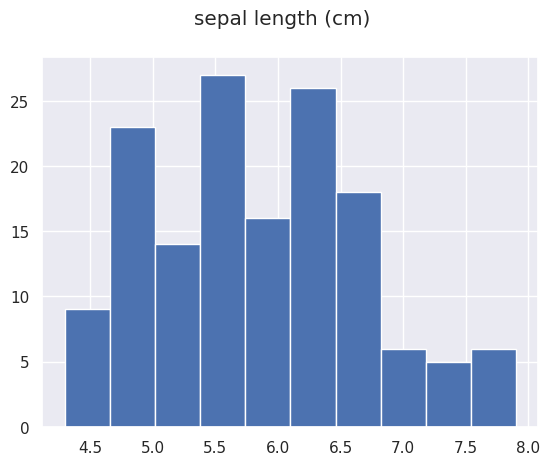

In [15]:
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

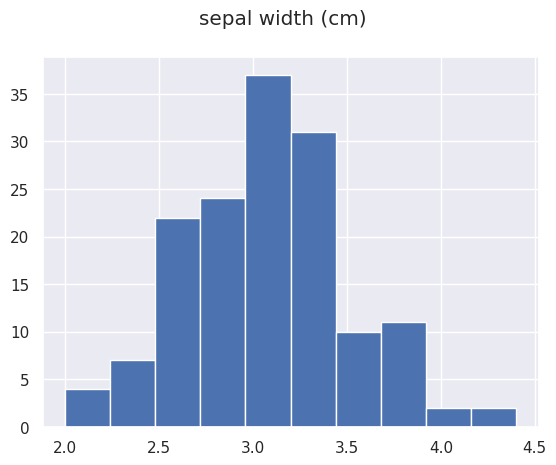

In [16]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

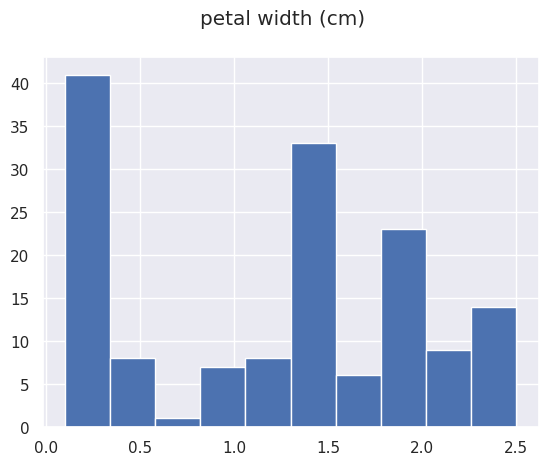

In [17]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

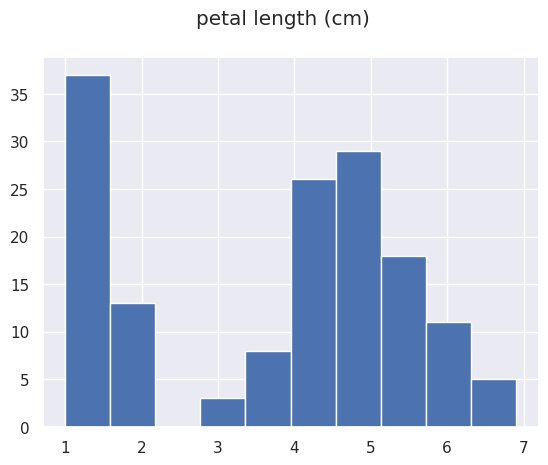

In [18]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

Relación de las caracteristicas con el target

In [19]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
#Crear una nueva columna con el nombre de las especies
df["target_name"] = df["target"].map({0:"setosa", 1:"versicolor", 2:"virginica"})

In [21]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Target y caracteristicas

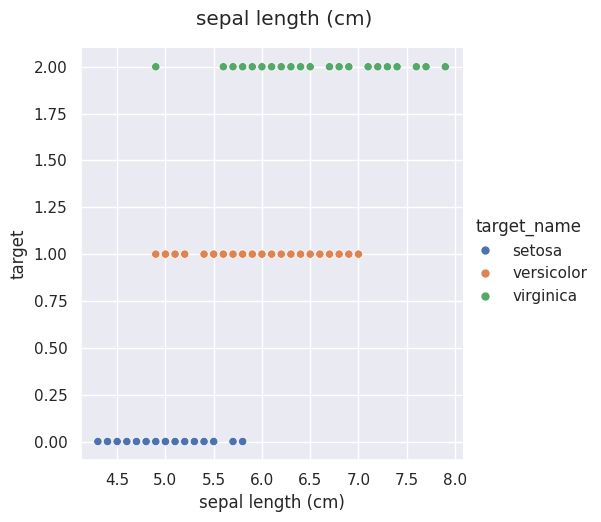

In [22]:
col = "sepal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.04)

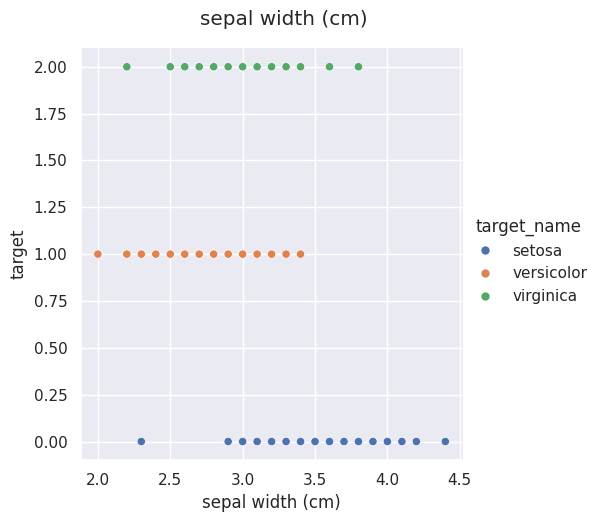

In [23]:
col = "sepal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.04)

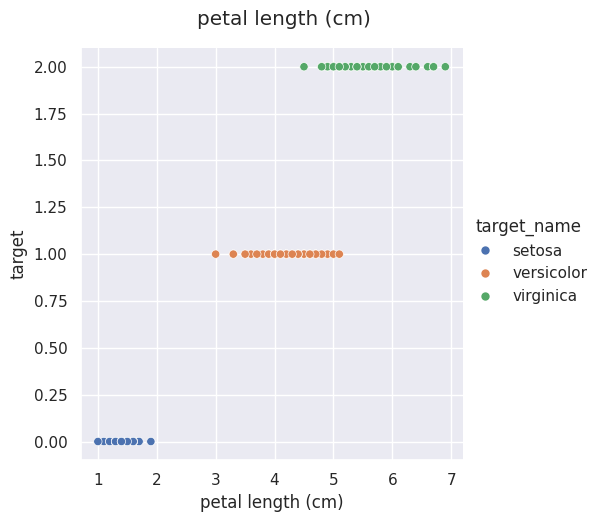

In [24]:
col = "petal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.04)

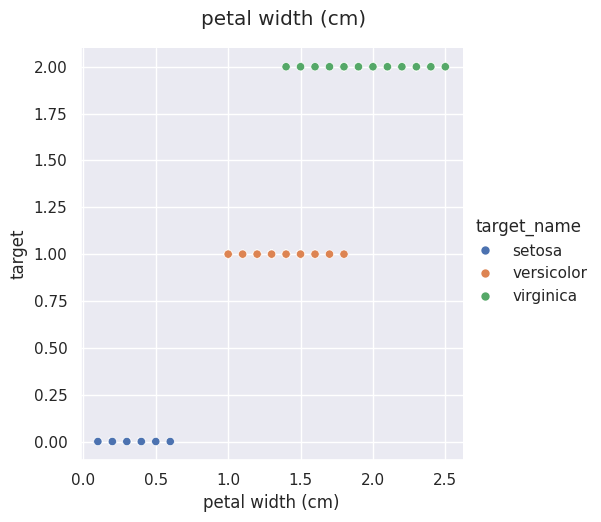

In [25]:
col = "petal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.04)

Eploratory Data Analysis (EDA) - pairplots


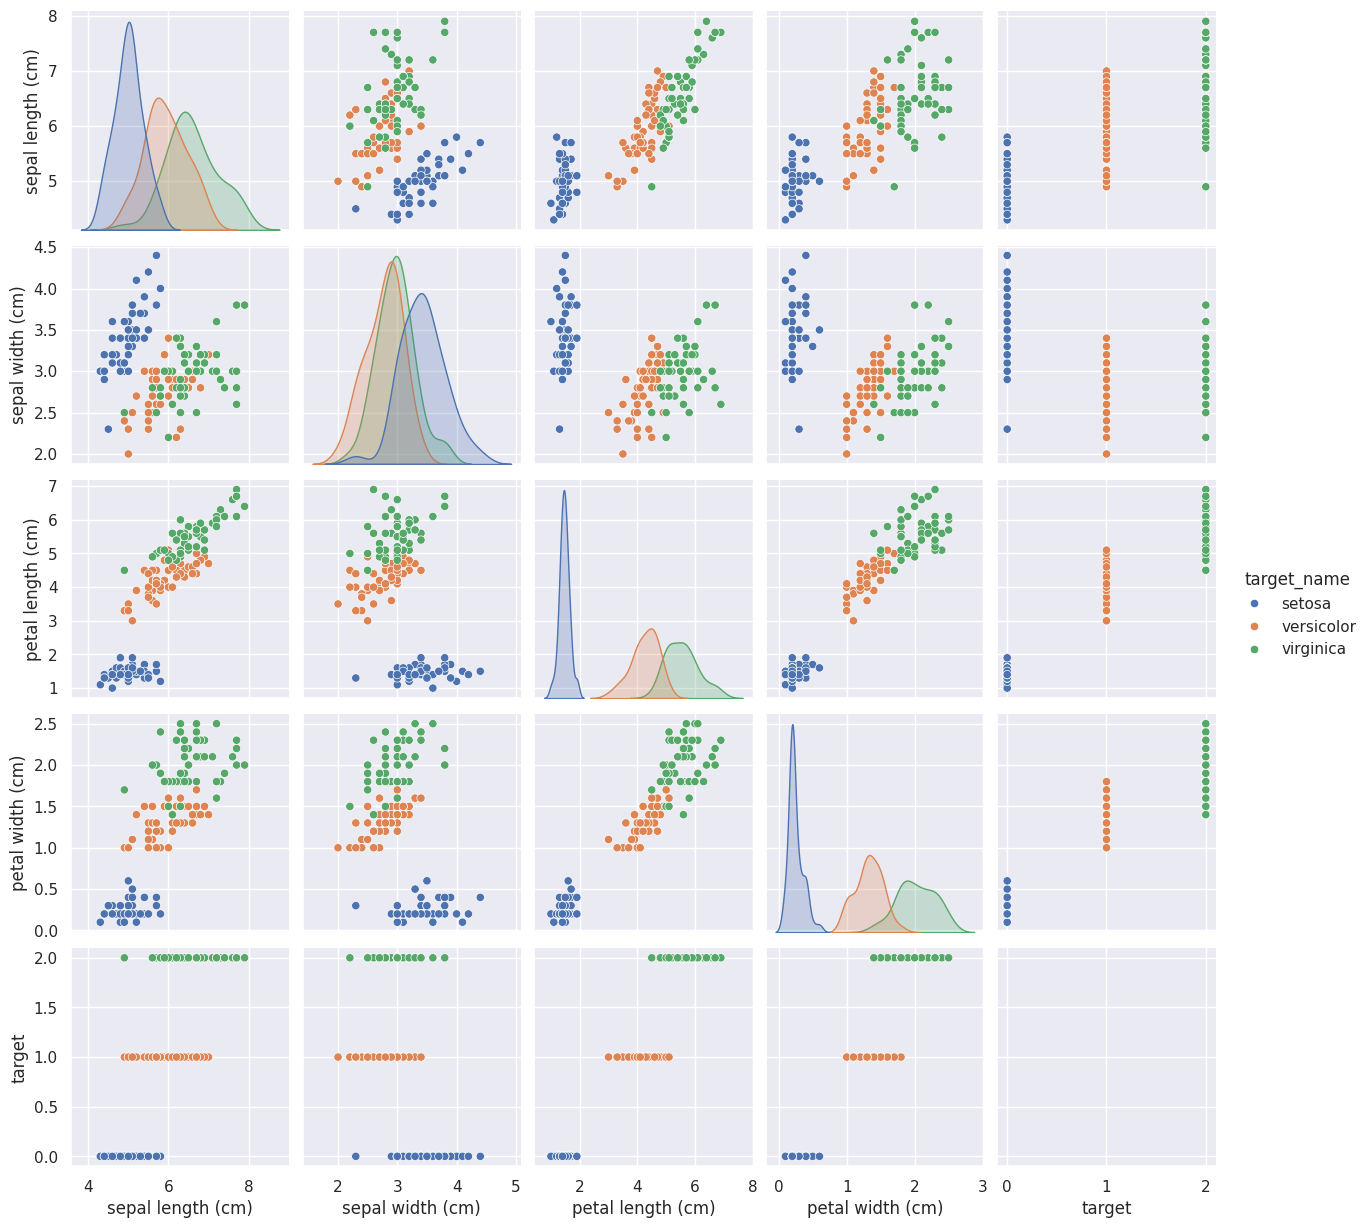

In [26]:
sns.pairplot(df, hue="target_name")

Train test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42)

In [29]:
#Dimenciones
df_train.shape

(112, 6)

In [30]:
#Dimenciones
df_test.shape

(38, 6)

In [31]:
#Primeras 5 filas
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
4,5.0,3.6,1.4,0.2,0,setosa
32,5.2,4.1,1.5,0.1,0,setosa
142,5.8,2.7,5.1,1.9,2,virginica
85,6.0,3.4,4.5,1.6,1,versicolor
86,6.7,3.1,4.7,1.5,1,versicolor


Preparar los datos para el modelado

In [32]:
# Dividir los datos en matrices
X_train = df_train.drop(columns=["target", "target_name"]).values
y_train = df_train["target"].values
X_test = df_test.drop(columns=["target", "target_name"]).values
y_test = df_test["target"].values

# Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Paso 1: Escalado de características
    ('classifier', LogisticRegression())    # Paso 2: Clasificación
])

# Definir los hiperparámetros para RandomizedSearchCV
param_dist = {
    'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
    'classifier__max_iter': [100, 200, 300, 400, 500, 1000]
}

# Crear el RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Ajustar el RandomizedSearchCV
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = random_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_test_pred = best_model.predict(X_test)

import joblib

# Almacenar el modelo entrenado en un archivo .joblib
filename = 'final_model.joblib'
joblib.dump(best_model, filename)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Matriz de confusión:')
print(conf_matrix)
print('Reporte de clasificación:')
print(class_report)

# Validación cruzada para el modelo con datos de entrenamiento
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {np.mean(cross_val_scores):.4f}')

# Almacenar el modelo entrenado en un archivo .sav
filename = 'final_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

# Cargar el modelo desde el archivo
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Obtener el clasificador del pipeline
classifier = loaded_model.named_steps['classifier']
print('Mejores hiperparámetros:', random_search.best_params_)
print('Coeficientes del clasificador:', classifier.coef_)
print('Intercepto del clasificador:', classifier.intercept_)

Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000
F1 Score: 1.0000
Matriz de confusión:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Cross-validated accuracy: 0.9549
Mejores hiperparámetros: {'classifier__max_iter': 200, 'classifier__C': 1}
Coeficientes del clasificador: [[-0.97511573  1.08893052 -1.78416098 -1.65224049]
 [ 0.5072161  -0.30353329 -0.3290721  -0.69052199]
 [ 0.46789963 -0.78539723  2.11323308  2.34276248]]
Intercepto del clasificador: [-0.39150253  1.92427457 -1.53277204]
